# SVM

In [3]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [4]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Load dataset from CSV file
df = pd.read_csv('spamain.csv', encoding='ISO-8859-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
# Data cleaning and preprocessing
df = df[['v1', 'v2']]  # Only keep relevant columns
df.columns = ['label', 'message']  # Rename columns
df.dropna(inplace=True)  # Drop missing values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to 0 and 1


In [10]:
# Function to preprocess the text
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word.isalnum()]  # Remove special characters
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [ps.stem(word) for word in tokens]  # Perform stemming
    return " ".join(tokens)

df['message'] = df['message'].apply(preprocess_text)  # Apply preprocessing

In [11]:
# Split data into features and labels
X = df['message']
y = df['label']

# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(max_features=3000)  # Use 3000 as an arbitrary limit, adjust as needed
X = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = SVC(kernel='linear', C=1)  # Linear kernel SVM for spam classification
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9803
Model Precision: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



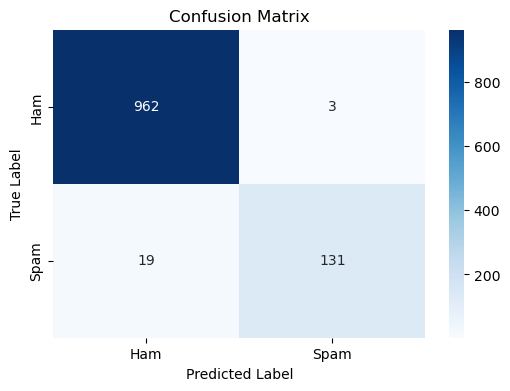

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



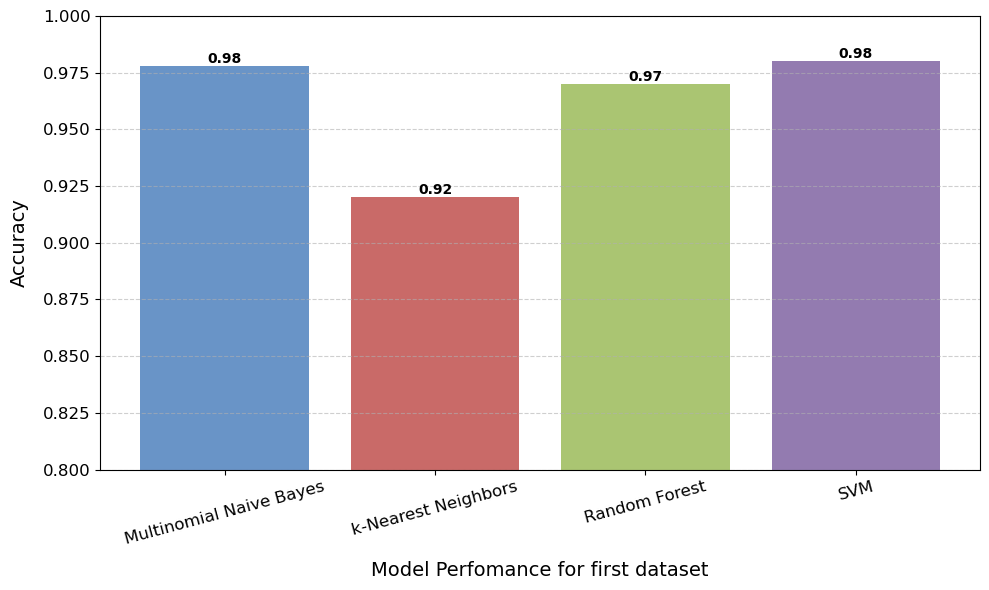

In [6]:
import matplotlib.pyplot as plt

# Accuracy data for the models
models = ['Multinomial Naive Bayes', 'k-Nearest Neighbors', 'Random Forest', 'SVM']
accuracies = [0.978, 0.92, 0.97, 0.98]

# Plotting the accuracy histogram
plt.figure(figsize=(10, 6), dpi=100)  # High resolution for academic presentation
bars = plt.bar(models, accuracies, color=['#4f81bd', '#c0504d', '#9bbb59', '#8064a2'], alpha=0.85)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling and labels
plt.ylim(0.8, 1.0)  # Focused y-axis
plt.xlabel('Model Perfomance for first dataset', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


# Display the plot
plt.tight_layout()
plt.show()



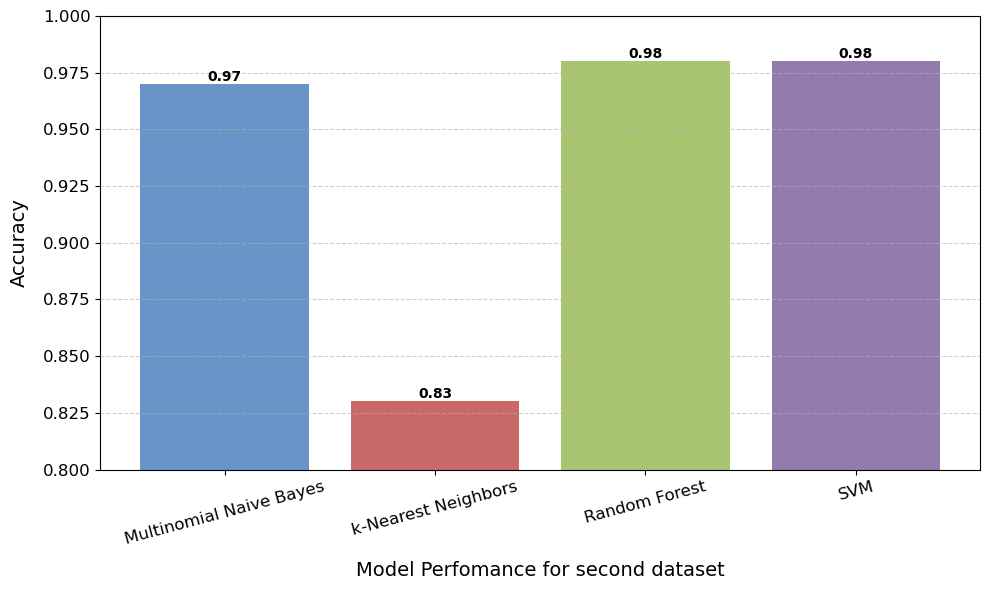

In [8]:
import matplotlib.pyplot as plt

# Accuracy data for the models
models = ['Multinomial Naive Bayes', 'k-Nearest Neighbors', 'Random Forest', 'SVM']
accuracies = [0.97, 0.83, 0.98, 0.98]

# Plotting the accuracy histogram
plt.figure(figsize=(10, 6), dpi=100)  # High resolution for academic presentation
bars = plt.bar(models, accuracies, color=['#4f81bd', '#c0504d', '#9bbb59', '#8064a2'], alpha=0.85)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling and labels
plt.ylim(0.8, 1.0)  # Focused y-axis
plt.xlabel('Model Perfomance for second dataset', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


# Display the plot
plt.tight_layout()
plt.show()

# Second dataset https://www.kaggle.com/datasets/hailinsong/spam-ham-email-combined-dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model Accuracy: 0.9742
Model Precision: 0.9926
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       544
           1       0.99      0.95      0.97       425

    accuracy                           0.97       969
   macro avg       0.98      0.97      0.97       969
weighted avg       0.97      0.97      0.97       969



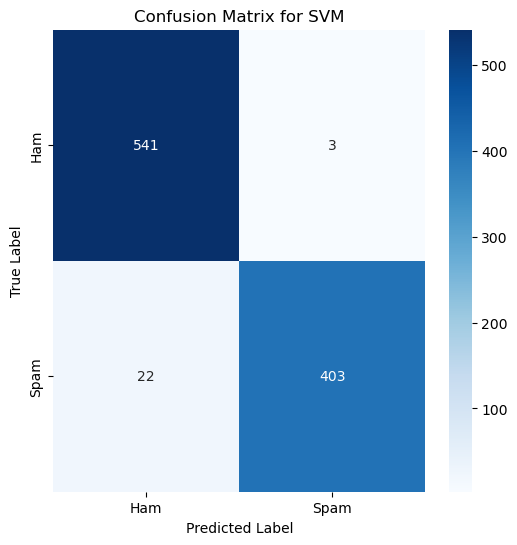

In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('spamham.csv', encoding='ISO-8859-1')
df = df[['Text', 'Label']]
df.columns = ['message', 'label']
df.dropna(inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

df['message'] = df['message'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['message']).toarray()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Classification Report:\n{report}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


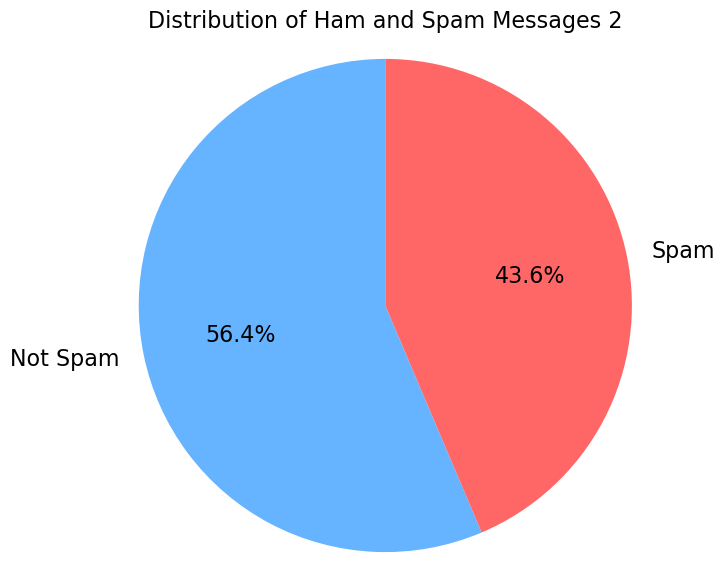

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded and preprocessed as described
df = pd.read_csv('spamham.csv', encoding='ISO-8859-1')
df = df[['Text', 'Label']]
df.columns = ['message', 'label']
df.dropna(inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Create a pie chart for data distribution
label_counts = df['label'].value_counts()
labels = ['Not Spam', 'Spam']

plt.figure(figsize=(7, 7))

# Create the pie chart with larger font size and labels inside the chart
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'], 
        textprops={'fontsize': 16}, pctdistance=0.6)

# Title with larger font size
plt.title('Distribution of Ham and Spam Messages 2', fontsize=16)

# Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis('equal')  

# Show the plot
plt.show()



In [23]:
df

,message,label
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
4840,It has been prepared- ready for your signature...,0
4841,And to you too,0
4842,<html><head><style>P{margin:0px;padding:0px}body,1
4843,Robinson talking now voice cracking but resolu...,0


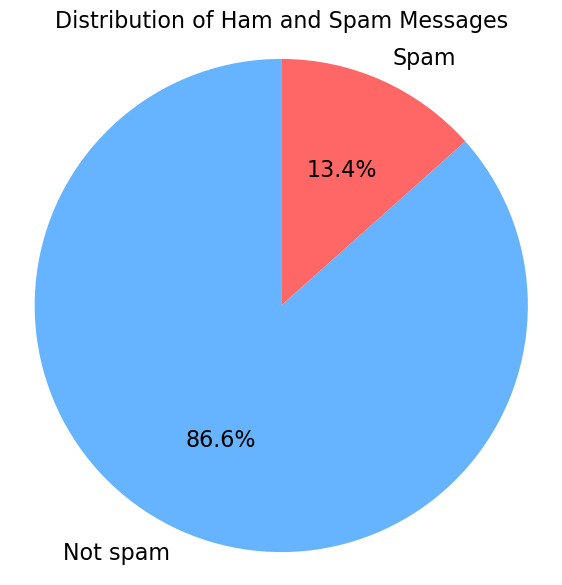

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the new dataset
df = pd.read_csv('spamain.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]  # Only keep relevant columns
df.columns = ['label', 'message']  # Rename columns
df.dropna(inplace=True)  # Drop missing values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to 0 and 1

# Create a pie chart for data distribution
label_counts = df['label'].value_counts()
labels = ['Not spam', 'Spam']

# Create the pie chart with larger font size and labels inside the chart
plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'],
        textprops={'fontsize': 16}, pctdistance=0.6)

# Title with larger font size
plt.title('Distribution of Ham and Spam Messages', fontsize=16)

# Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()
